In [1]:
from femtoPy.preamble import *
import diffusion as diff
import time as time

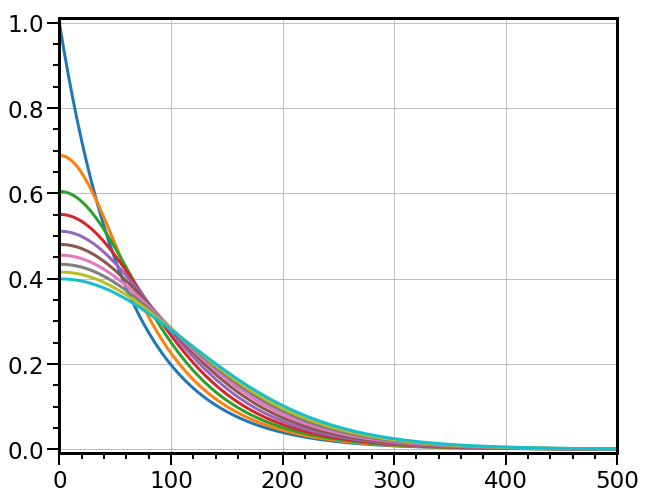

In [3]:
def update(dist,E):
    dist.prep()
    dist.dif_matrix()
    dist.boundary()
    dist.step1()

    return
    

dt=.05
dy=.01
y_min=0
y_max=5
t_min=0
t_max=100

grid=diff.classes.Grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

N=np.arange(t_min,t_max,dt).size

def exp(x,alpha):
    y=10*np.exp(-x*alpha)
    return y

s=1e-4
D=1.004e-2
A=1./2100.
q=1.6e-19

elec=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=s,D=D,A=A,q=q)
# hole=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=1e-2,D=1.004e-2,tau=2100,q=1.6e-19)
E=diff.classes.Field(grid=grid,E0=np.asmatrix(np.zeros(grid.y.size)).T)

t0=time.time()
for i in range(0,grid.t.size-1):
    #E.solveGauss(grid,elec,hole,i)
    update(elec,E)
    #update(hole,E)
    
fig,ax=plt.subplots(figsize=(10,8))
X,Y=np.meshgrid(np.asarray(grid.t)[0,:],np.asarray(grid.y)[:,0])
#ax.contourf(X,Y,elec.density)
#ax.contourf(X,Y,E.field)
#ax.plot(elec.density[:,10])
for i in range(0,1000,100):
    ax.plot(elec.density[:,i])

plt.show()


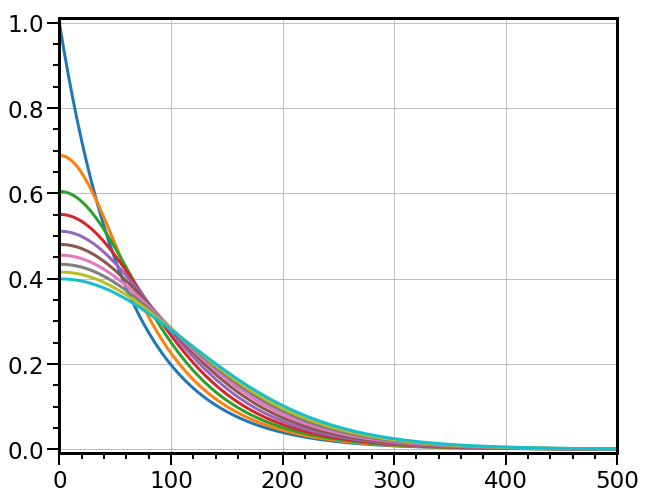

In [4]:

def update(dist,E):
    dist.prep()
    dist.dif_matrix()
    dist.boundary()
    dist.step()

    return
    

dt=.05
dy=.01
y_min=0
y_max=5
t_min=0
t_max=100

grid=diff.classes.Grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)

N=np.arange(t_min,t_max,dt).size

def exp(x,alpha):
    y=10*np.exp(-x*alpha)
    return y

s=1e-4
D=1.004e-2
A=1./2100.
q=1.6e-19

elec=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=s,D=D,A=A,q=q)
# hole=diff.classes.Distribution(grid=grid,d0=np.exp(-grid.y*1.62),s=1e-2,D=1.004e-2,tau=2100,q=1.6e-19)
E=diff.classes.Field(grid=grid,E0=np.asmatrix(np.zeros(grid.y.size)).T)

t0=time.time()
for i in range(0,grid.t.size-1):
    #E.solveGauss(grid,elec,hole,i)
    update(elec,E)
    #update(hole,E)
    
fig,ax=plt.subplots(figsize=(10,8))
X,Y=np.meshgrid(np.asarray(grid.t)[0,:],np.asarray(grid.y)[:,0])
#ax.contourf(X,Y,elec.density)
#ax.contourf(X,Y,E.field)
#ax.plot(elec.density[:,10])
for i in range(0,1000,100):
    ax.plot(elec.density[:,i])

plt.show()


In [25]:
import bandmat as bm

a_bm = bm.BandMat(
    1, 1,
    np.array([
        [0.0, 0,-1,-1,-1],
        [0,0,0,0,0],
        [-1.,-1.,-1.,0,0],
    ])
)

b_bm = bm.BandMat(
    0, 0,
    np.array([
        [0.3, 0.1, 0.5, 0.6, 0.0],
    ])
)

c_bm = bm.dot_mm(a_bm.T, b_bm)

d_bm = a_bm + b_bm

a_full = a_bm.full()
b_full = b_bm.full()
c_full = c_bm.full()
d_full = d_bm.full()

print('a_full:')
print (a_full)
print
print ('b_full:')
print (b_full)
print
print ('np.dot(a_full.T, b_full):')
print (c_full)
print
print ('a_full + b_full:')
print (d_full)
print


a_full:
[[ 0.  0.  0.  0.  0.]
 [-1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.]]
b_full:
[[ 0.3  0.   0.   0.   0. ]
 [ 0.   0.1  0.   0.   0. ]
 [ 0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.6  0. ]
 [ 0.   0.   0.   0.   0. ]]
np.dot(a_full.T, b_full):
[[ 0.  -0.1  0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0. ]
 [ 0.  -0.1  0.  -0.6  0. ]
 [ 0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.  -0.6  0. ]]
a_full + b_full:
[[ 0.3  0.   0.   0.   0. ]
 [-1.   0.1 -1.   0.   0. ]
 [ 0.  -1.   0.5 -1.   0. ]
 [ 0.   0.  -1.   0.6 -1. ]
 [ 0.   0.   0.   0.   0. ]]


<function print>